<a href="https://colab.research.google.com/github/OlgaNezh/Computer_Vision/blob/main/CV_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глубокое обучение в компьютерном зрении. Интерактивный курс
Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.color import rgb2hsv, hsv2rgb
import scipy.signal

In [3]:
img = imageio.imread('pyat.jpeg')
img = img.astype(np.float32) / 255
print(img.shape)

(2736, 3648, 3)


In [4]:
print(img[:5, :5, :])

[[[0.54509807 0.67058825 0.76862746]
  [0.53333336 0.65882355 0.75686276]
  [0.50980395 0.6431373  0.7490196 ]
  [0.49411765 0.63529414 0.7372549 ]
  [0.49019608 0.627451   0.74509805]]

 [[0.5294118  0.654902   0.7529412 ]
  [0.5294118  0.654902   0.7529412 ]
  [0.5019608  0.63529414 0.7411765 ]
  [0.49803922 0.6392157  0.73333335]
  [0.49019608 0.627451   0.74509805]]

 [[0.53333336 0.65882355 0.75686276]
  [0.5176471  0.6509804  0.7490196 ]
  [0.5137255  0.64705884 0.7529412 ]
  [0.49019608 0.63529414 0.7411765 ]
  [0.49411765 0.6313726  0.7490196 ]]

 [[0.5294118  0.6666667  0.7529412 ]
  [0.5254902  0.6509804  0.7490196 ]
  [0.50980395 0.6392157  0.7607843 ]
  [0.5058824  0.64705884 0.7490196 ]
  [0.49411765 0.627451   0.77254903]]

 [[0.5372549  0.654902   0.75686276]
  [0.50980395 0.6509804  0.74509805]
  [0.5137255  0.64705884 0.7529412 ]
  [0.5019608  0.6392157  0.7490196 ]
  [0.49803922 0.6431373  0.75686276]]]


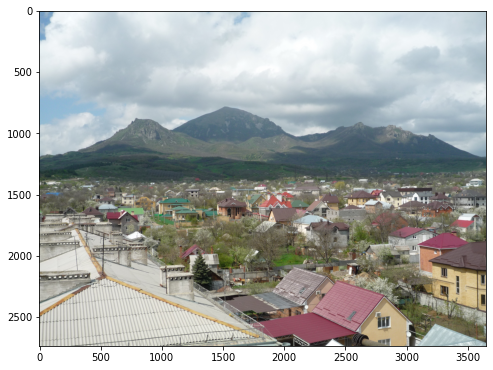

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

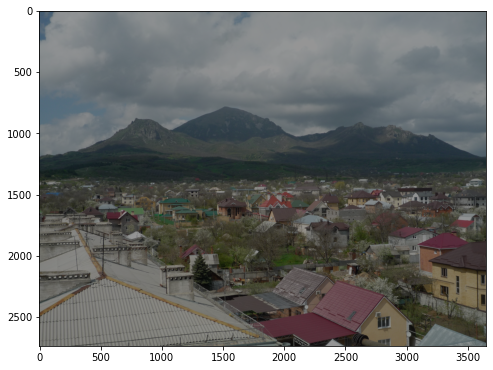

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img/1.7)

## Линейное уменьшение яркости

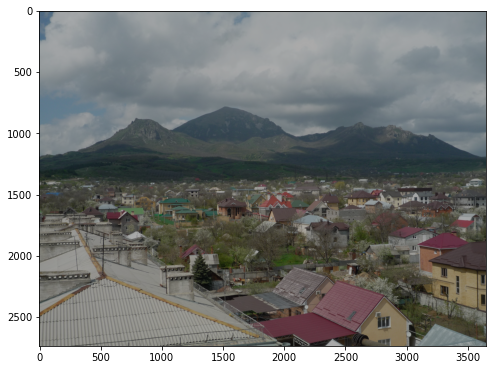

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img/1.5)

## Нелинейное уменьшение яркости



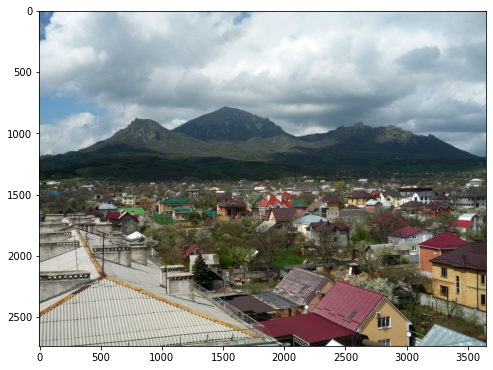

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img**1.5)

## Получение ЧБ изображения по цветному

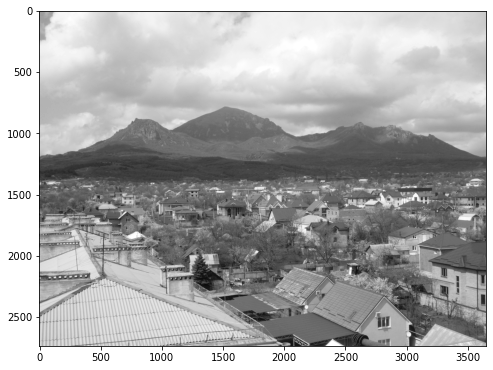

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(np.mean(img, axis=2), cmap='gray')

## Цветовое пространство HSV

In [12]:
img_hsv = rgb2hsv(img)
print(img[:5, :5, :])

[[[0.54509807 0.67058825 0.76862746]
  [0.53333336 0.65882355 0.75686276]
  [0.50980395 0.6431373  0.7490196 ]
  [0.49411765 0.63529414 0.7372549 ]
  [0.49019608 0.627451   0.74509805]]

 [[0.5294118  0.654902   0.7529412 ]
  [0.5294118  0.654902   0.7529412 ]
  [0.5019608  0.63529414 0.7411765 ]
  [0.49803922 0.6392157  0.73333335]
  [0.49019608 0.627451   0.74509805]]

 [[0.53333336 0.65882355 0.75686276]
  [0.5176471  0.6509804  0.7490196 ]
  [0.5137255  0.64705884 0.7529412 ]
  [0.49019608 0.63529414 0.7411765 ]
  [0.49411765 0.6313726  0.7490196 ]]

 [[0.5294118  0.6666667  0.7529412 ]
  [0.5254902  0.6509804  0.7490196 ]
  [0.50980395 0.6392157  0.7607843 ]
  [0.5058824  0.64705884 0.7490196 ]
  [0.49411765 0.627451   0.77254903]]

 [[0.5372549  0.654902   0.75686276]
  [0.50980395 0.6509804  0.74509805]
  [0.5137255  0.64705884 0.7529412 ]
  [0.5019608  0.6392157  0.7490196 ]
  [0.49803922 0.6431373  0.75686276]]]


## Изменение тона

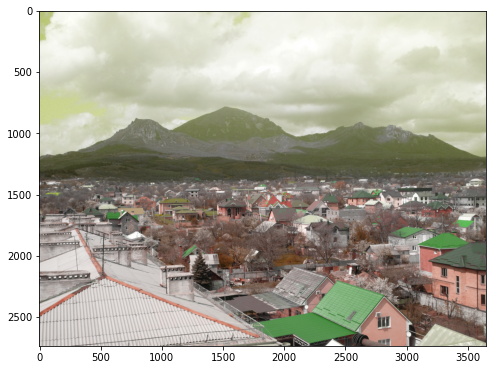

In [13]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 3
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Линейное уменьшение насыщенности

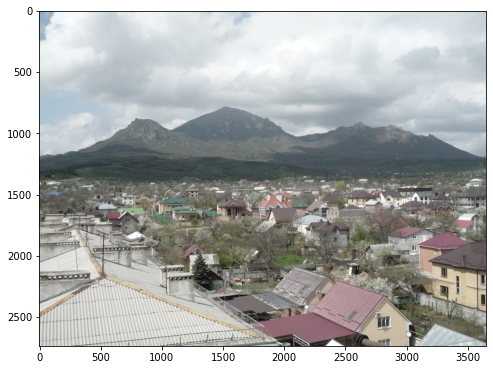

In [15]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 1.7
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Оконная функция. Фильтрация

In [16]:
win_size = (10, 10)

sigma = 3

w = np.zeros(win_size, dtype=np.float32)

for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

[[0.00135338 0.00223134 0.00329199 0.00434606 0.00513427 0.00542758
  0.00513427 0.00434606 0.00329199 0.00223134]
 [0.00223134 0.00367886 0.00542758 0.00716545 0.00846498 0.00894856
  0.00846498 0.00716545 0.00542758 0.00367886]
 [0.00329199 0.00542758 0.00800753 0.01057148 0.01248872 0.01320218
  0.01248872 0.01057148 0.00800753 0.00542758]
 [0.00434606 0.00716545 0.01057148 0.01395639 0.01648752 0.01742942
  0.01648752 0.01395639 0.01057148 0.00716545]
 [0.00513427 0.00846498 0.01248872 0.01648752 0.01947771 0.02059042
  0.01947771 0.01648752 0.01248872 0.00846498]
 [0.00542758 0.00894856 0.01320218 0.01742942 0.02059042 0.02176671
  0.02059042 0.01742942 0.01320218 0.00894856]
 [0.00513427 0.00846498 0.01248872 0.01648752 0.01947771 0.02059042
  0.01947771 0.01648752 0.01248872 0.00846498]
 [0.00434606 0.00716545 0.01057148 0.01395639 0.01648752 0.01742942
  0.01648752 0.01395639 0.01057148 0.00716545]
 [0.00329199 0.00542758 0.00800753 0.01057148 0.01248872 0.01320218
  0.01248872

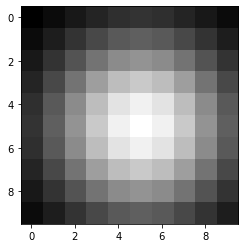

In [17]:
print(w)
plt.imshow(w, cmap='gray')

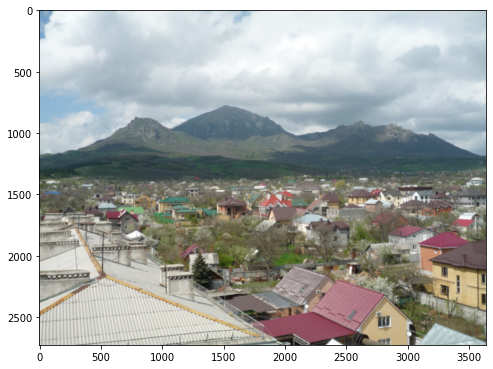

In [18]:
out_img = []

for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

plt.figure(figsize=(8, 8))
plt.imshow(out_img)